In [1]:
import pandas as pd
import numpy as np
import datetime
import boto3
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from pandas.tseries.offsets import DateOffset

Using TensorFlow backend.


In [2]:
#The boto library is used to read the values from the IoT analytics dataset
#client = boto3.client("iotanalytics")
#region = 'dublin'
#device_type = 'evc'
#dataset_name = 'grianity_analytics_' + region + '_' + device_type + '_dataset'
#dataset_url = client.get_dataset_content(datasetname=dataset_name)
#df = pd.read_csv(dataset_url, header=0, parse_dates=[0], index_col=0)

In [2]:
df = pd.read_csv("ev_data.csv", header=0, parse_dates=[0], index_col=0)
df = df.resample('H').sum()

#Using 90% of the data for training
num_data = len(df)
num_train = int(0.90 * num_data)
num_test = num_data - num_train
train_data = df[0:num_train]
test_data = df[num_test:]


# Normalising the data
scaler = MinMaxScaler()
scaler.fit(train_data)
scaler.fit(test_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

/home/eoin/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [3]:
 n_input = 24
n_features = 1
generator = TimeseriesGenerator(train_data, train_data, length=n_input, batch_size=5)


In [4]:
# LSDM model
model = Sequential()
model.add(LSTM(180, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator, epochs=180)

Epoch 1/180
38/38 [==============================] - 3s 70ms/step - loss: 0.0645
Epoch 2/180
38/38 [==============================] - 2s 47ms/step - loss: 0.0512
Epoch 3/180
38/38 [==============================] - 1s 39ms/step - loss: 0.0501
Epoch 4/180
38/38 [==============================] - 1s 39ms/step - loss: 0.0394
Epoch 5/180
38/38 [==============================] - 2s 40ms/step - loss: 0.0364
Epoch 6/180
38/38 [==============================] - 2s 40ms/step - loss: 0.0274
Epoch 7/180
38/38 [==============================] - 2s 40ms/step - loss: 0.0254
Epoch 8/180
38/38 [==============================] - 2s 40ms/step - loss: 0.0202
Epoch 9/180
38/38 [==============================] - 2s 41ms/step - loss: 0.0182
Epoch 10/180
38/38 [==============================] - 2s 40ms/step - loss: 0.0183
Epoch 11/180
38/38 [==============================] - 2s 41ms/step - loss: 0.0169
Epoch 12/180
38/38 [==============================] - 2s 47ms/step - loss: 0.0176
Epoch 13/180
38/38 [=====

/home/eoin/.local/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117804). Check your callbacks.
  % delta_t_median)
/home/eoin/.local/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111991). Check your callbacks.
  % delta_t_median)


38/38 [==============================] - 11s 290ms/step - loss: 0.0145
Epoch 51/180
38/38 [==============================] - 4s 117ms/step - loss: 0.0136
Epoch 52/180
38/38 [==============================] - 4s 95ms/step - loss: 0.0139
Epoch 53/180
38/38 [==============================] - 2s 56ms/step - loss: 0.0139
Epoch 54/180
38/38 [==============================] - 1s 36ms/step - loss: 0.0139
Epoch 55/180
38/38 [==============================] - 2s 46ms/step - loss: 0.0150
Epoch 56/180
38/38 [==============================] - 1s 36ms/step - loss: 0.0130: 0s - loss: 0.
Epoch 57/180
38/38 [==============================] - 1s 38ms/step - loss: 0.0137
Epoch 58/180
38/38 [==============================] - 1s 36ms/step - loss: 0.0145
Epoch 59/180
38/38 [==============================] - 1s 36ms/step - loss: 0.0144
Epoch 60/180
38/38 [==============================] - 1s 37ms/step - loss: 0.0133
Epoch 61/180
38/38 [==============================] - 1s 36ms/step - loss: 0.0146
Epoch 62/18

38/38 [==============================] - 3s 70ms/step - loss: 0.0127
Epoch 149/180
38/38 [==============================] - 2s 63ms/step - loss: 0.0122: 
Epoch 150/180
38/38 [==============================] - 2s 53ms/step - loss: 0.0117: 0s - los
Epoch 151/180
38/38 [==============================] - 2s 49ms/step - loss: 0.0133
Epoch 152/180
38/38 [==============================] - 2s 56ms/step - loss: 0.0124
Epoch 153/180
38/38 [==============================] - 3s 70ms/step - loss: 0.0124
Epoch 154/180
38/38 [==============================] - 2s 44ms/step - loss: 0.0128
Epoch 155/180
38/38 [==============================] - 2s 47ms/step - loss: 0.0122: 
Epoch 156/180
38/38 [==============================] - 2s 49ms/step - loss: 0.0117
Epoch 157/180
38/38 [==============================] - 3s 71ms/step - loss: 0.0116
Epoch 158/180
38/38 [==============================] - 2s 52ms/step - loss: 0.0111
Epoch 159/180
38/38 [==============================] - 2s 66ms/step - loss: 0.0110
Epoc

In [5]:
    prediction_list = []
    batch = test_data[-n_input:].reshape((1, n_input, n_features))

    for i in range(n_input):
        prediction_list.append(model.predict(batch)[0])
        batch = np.append(batch[:, 1:, :], [[prediction_list[i]]], axis=1)

    df_prediction = pd.DataFrame(scaler.inverse_transform(prediction_list), index=df[-n_input:].index, columns=['prediction'])

    df_tests = pd.concat([df, df_prediction], axis=1)

/home/eoin/.local/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


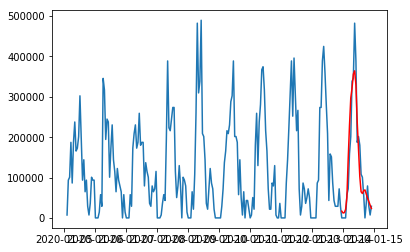

In [6]:
    pyplot.plot(df_tests.index, df_tests['power'], label='original')
    pyplot.plot(df_tests.index, df_tests['prediction'], color='red', label='prediction')
    pyplot.show()

In [10]:
# Add future date predictions
train = df
scaler.fit(train)
train = scaler.transform(train)
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=5)

model.fit_generator(generator, epochs=100)
prediction_list = []
batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    prediction_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:, :], [[prediction_list[i]]], axis=1)


Epoch 1/100
43/43 [==============================] - 2s 40ms/step - loss: 0.0062
Epoch 2/100
43/43 [==============================] - 2s 38ms/step - loss: 0.0089
Epoch 3/100
43/43 [==============================] - 2s 38ms/step - loss: 0.0066
Epoch 4/100
43/43 [==============================] - 2s 38ms/step - loss: 0.0060
Epoch 5/100
43/43 [==============================] - 2s 52ms/step - loss: 0.0046
Epoch 6/100
43/43 [==============================] - 3s 61ms/step - loss: 0.0072
Epoch 7/100
43/43 [==============================] - 3s 65ms/step - loss: 0.0048
Epoch 8/100
43/43 [==============================] - 3s 60ms/step - loss: 0.0040
Epoch 9/100
43/43 [==============================] - 2s 52ms/step - loss: 0.0038
Epoch 10/100
43/43 [==============================] - 2s 44ms/step - loss: 0.0037
Epoch 11/100
43/43 [==============================] - 2s 46ms/step - loss: 0.0038
Epoch 12/100
43/43 [==============================] - 2s 47ms/step - loss: 0.0045
Epoch 13/100
43/43 [=====

43/43 [==============================] - 3s 60ms/step - loss: 0.0045


In [11]:
add_dates = [df.index[-1] + DateOffset(hours=x) for x in range(0, 25)]
future_dates = pd.DataFrame(index=add_dates[1:], columns=df.columns)

In [12]:
df_prediction = pd.DataFrame(scaler.inverse_transform(prediction_list), index=future_dates[-n_input:].index, columns=['prediction'])
df_proj = pd.concat([df, df_prediction], axis=1)

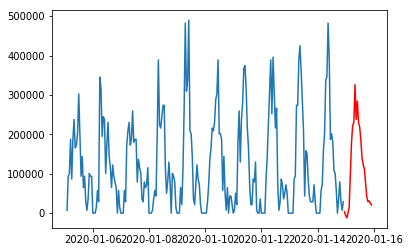

In [13]:

pyplot.plot(df_proj.index, df_proj['power'], label='original')
pyplot.plot(df_proj.index, df_proj['prediction'], color='red', label='prediction')
pyplot.show()